In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_pd = pd.read_csv(city_data_to_load, encoding="utf-8")
ride_pd = pd.read_csv(ride_data_to_load, encoding="utf-8")

# Combine the data into a single dataset
merge_table = pd.merge(city_pd, ride_pd, how= "left", on=["city", "city"])

# Display the data table for preview
print(merge_table)

                 city  driver_count   type                 date   fare  \
0         Richardfort            38  Urban  2018-02-24 08:40:38  13.93   
1         Richardfort            38  Urban  2018-02-13 12:46:07  14.00   
2         Richardfort            38  Urban  2018-02-16 13:52:19  17.92   
3         Richardfort            38  Urban  2018-02-01 20:18:28  10.26   
4         Richardfort            38  Urban  2018-04-17 02:26:37  23.00   
5         Richardfort            38  Urban  2018-04-21 03:44:04   9.54   
6         Richardfort            38  Urban  2018-02-03 00:14:26  29.04   
7         Richardfort            38  Urban  2018-02-08 15:50:12  16.55   
8         Richardfort            38  Urban  2018-04-03 15:07:34  40.77   
9         Richardfort            38  Urban  2018-02-19 14:09:20  27.11   
10        Richardfort            38  Urban  2018-04-22 03:06:56  39.74   
11        Richardfort            38  Urban  2018-01-31 14:51:01  43.92   
12        Richardfort            38  U

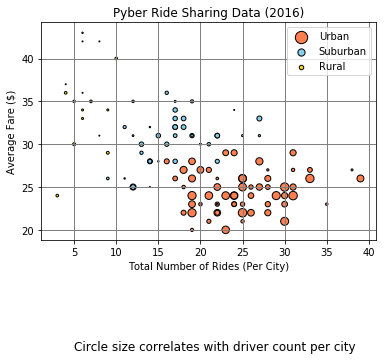

In [45]:
# Obtain the x and y coordinates for each of the three city types

#average fare per city
ave_fare_per_city =merge_table.groupby(["city"]).mean()
fares = ave_fare_per_city['fare']

total_rides_per_city =merge_table.groupby('city')['ride_id'].nunique()
city_type =merge_table.groupby('city')['type'].unique()
driver_count = ave_fare_per_city['driver_count']

rideSummary = pd.DataFrame({

    "Number of Rides":total_rides_per_city,
    "Average Fare": fares,
    "Number of Drivers": driver_count,
    "City Type": city_type
})

x_axis = rideSummary['Number of Rides']
y_axis = rideSummary['Average Fare']
numDrivers=rideSummary['Number of Drivers']

# Build the scatter plots for each city types

ax0 = rideSummary.loc[rideSummary['City Type']=="Urban"]
ax1 = rideSummary.loc[rideSummary['City Type']=="Suburban"]
ax2 = rideSummary.loc[rideSummary['City Type']=="Rural"]

y0 = round(ax0['Average Fare'],0)
y1 = round(ax1['Average Fare'],0)
y2 = round(ax2['Average Fare'],0)

x0 = ax0['Number of Rides']
x1 = ax1['Number of Rides']
x2 = ax2['Number of Rides']


numUrbanDrivers=ax0['Number of Drivers']
numSuburbanDrivers=ax1['Number of Drivers']
numRuralDrives=ax2['Number of Drivers']

# Incorporate the other graph properties
# Create a legend
fig = plt.figure()
ax = fig.add_subplot(111)
legend = ['Urban', 'Suburban', 'Rural']

ax.text(5, 6, 'Circle size correlates with driver count per city', fontsize=12)


# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(color='grey', linestyle='-', linewidth = 1)

plt.scatter(x0, y0, color="coral", edgecolors= "black", s=numUrbanDrivers)
plt.scatter(x1, y1,  color="skyblue", edgecolors= "black", s=numSuburbanDrivers)
plt.scatter(x2, y2,  color="gold", edgecolors= "black", s=numRuralDrives)


lgnd = plt.legend(loc = "upper right", scatterpoints =1, fontsize=10)
lgnd.legendHandles[0]._sizes =[30]
lgnd.legendHandles[1]._sizes =[30]
plt.legend(legend, loc="upper right", markerscale=2, scatterpoints=1, fontsize=10)

# Save Figure
plt.savefig('pyber_ride_sharing_plot.pdf', transparent=False, bbox_inches="tight")



In [20]:
# show plot
plt.show()



In [ ]:
# Obtain the x and y coordinates for each of the three city types
# x_axis = rideSummary['Number of Rides']
# y_axis = rideSummary['Average Fare']

# driversGrouped =city_pd.groupby('type')['driver_count'].sum()
# numDrivers = driversGrouped.sum()


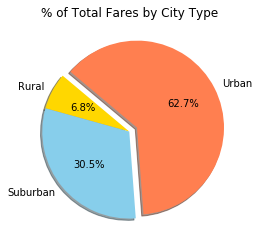

In [8]:
# Calulate Type Percents
fareGrouped =merge_table.groupby('type')['fare'].sum()
totalFares = fareGrouped.sum()
percentFares = round(fareGrouped/totalFares*100,1)


# Build the pie chart
sizes = percentFares
labels = fareGrouped.keys()
colors = ["gold", "skyblue", "coral"]
explode=(0, 0, 0.1)
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# save figure
plt.savefig('pyber_total_fares.pdf', transparent=False, bbox_inches="tight")


In [9]:
# Show Figure
plt.show()

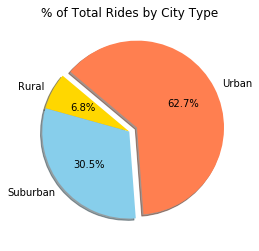

In [10]:
# calculate values for the pie chart
ridesGrouped =merge_table.groupby('type')['ride_id'].nunique()
totalRides = ridesGrouped.sum()
percentRides = round(ridesGrouped/totalRides*100,1)

# Set values for the pie chart
labels = ridesGrouped.keys()
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save figure
plt.savefig('pyber_total_rides.pdf', transparent=False, bbox_inches="tight")

In [11]:
# Show figure
plt.show()

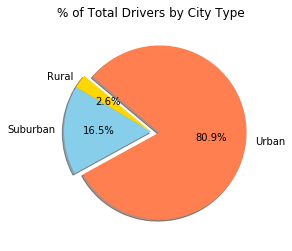

In [12]:
driversGrouped =city_pd.groupby('type')['driver_count'].sum()
numDrivers = driversGrouped.sum()

percentDrivers=  round(driversGrouped/numDrivers*100,1)
sizes = percentDrivers

# Set values for the pie chart
plt.title("% of Total Drivers by City Type")
colors = ["gold", "skyblue", "coral"]
plt.pie(sizes,  labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Save figure
plt.savefig('pyber_total_drivers.pdf', transparent=False, bbox_inches="tight")

In [13]:
# Show Figure
plt.show()